In [55]:
import aotools
import hcipy

print(hcipy.__version__)


0.6.0


In [40]:
from hcipy import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

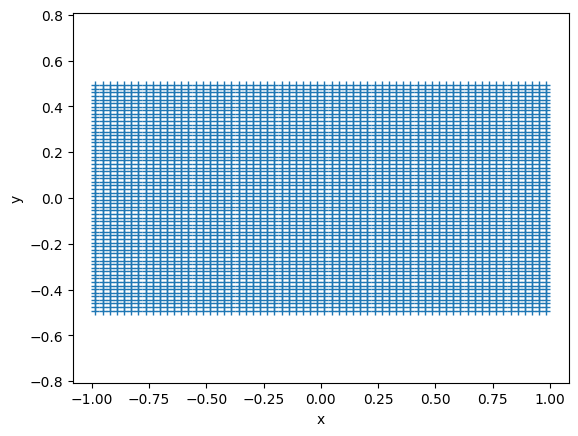

In [41]:
grid = make_uniform_grid([64,64], [2,1])

plt.plot(grid.x, grid.y, '+')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [42]:
print('Class of grid:', grid.coords.__class__)
print('Distance between points:', grid.delta)
print('Number of points on each dimension:', grid.dims)
print('Zero-point of the grid:', grid.zero)

Class of grid: <class 'hcipy.field.coordinates.RegularCoords'>
Distance between points: [0.03125  0.015625]
Number of points on each dimension: [64 64]
Zero-point of the grid: [-0.984375  -0.4921875]


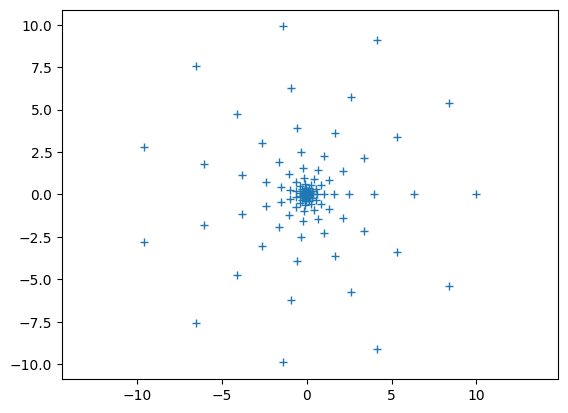

In [43]:
r = np.logspace(-1, 1, 11)
theta = np.linspace(0,2*np.pi, 11, endpoint=False)
coords = SeparatedCoords((r, theta))

polar_grid = PolarGrid(coords)
cart_grid = polar_grid.as_('cartesian')

plt.plot(cart_grid.x, cart_grid.y, '+')
plt.axis('equal')
plt.show()

In [44]:
try:
    print(polar_grid.x) # Doesn't work
except AttributeError as err:
    print(err)

'PolarGrid' object has no attribute 'x'


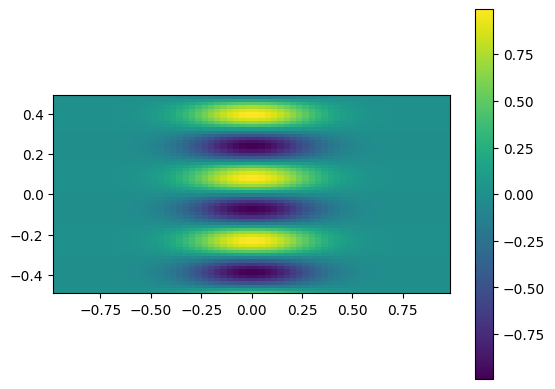

In [45]:
values = np.exp(-(grid.x**2 * 10)) * np.sin(20 * grid.y)
field = Field(values, grid)

imshow_field(field)
plt.colorbar()
plt.show()

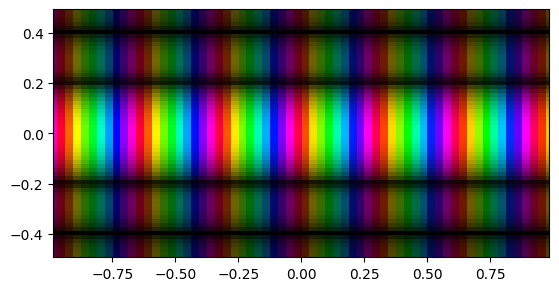

In [46]:
values2 = np.exp(1j * grid.x * 20) * np.sqrt(np.abs(np.sinc(5*grid.y)))
field2 = Field(values2, grid)

imshow_field(field2)
plt.show()

/var/folders/x3/g_6bp6fj0vx0dk27lr5119r80000gn/T/ipykernel_57867/390166894.py:1: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  mask = circular_aperture(0.7)(grid)


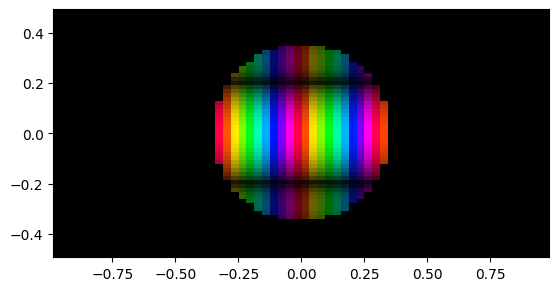

In [47]:
mask = circular_aperture(0.7)(grid)

imshow_field(field2, mask=mask)
plt.show()

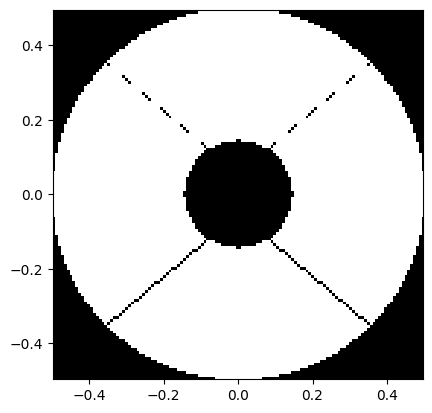

In [48]:
pupil_grid = make_pupil_grid(128)
aperture = make_magellan_aperture(True)

imshow_field(aperture(pupil_grid), cmap='gray')
plt.show()

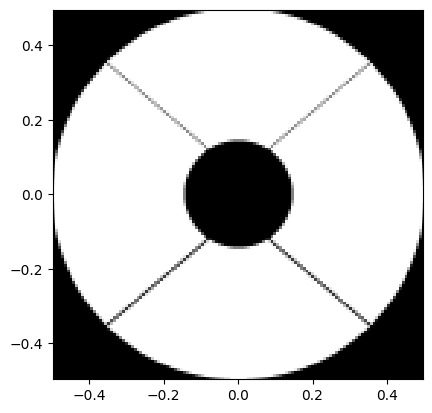

In [49]:
pupil = evaluate_supersampled(aperture, pupil_grid, 8)
imshow_field(pupil, cmap='gray')
plt.show()

In [50]:
from hcipy import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
pupil_grid = make_pupil_grid(1024)
aperture = circular_aperture(1)(pupil_grid)

wavefront = Wavefront(aperture, 1)

/var/folders/x3/g_6bp6fj0vx0dk27lr5119r80000gn/T/ipykernel_57867/2676508147.py:2: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  aperture = circular_aperture(1)(pupil_grid)


In [52]:
focal_grid = make_focal_grid(8, 16)

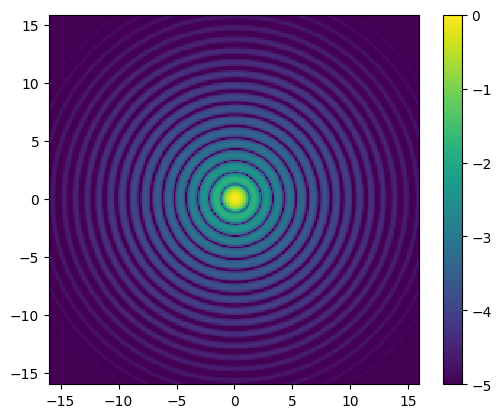

In [53]:
prop = FraunhoferPropagator(pupil_grid, focal_grid)

img = prop.forward(wavefront)

imshow_field(np.log10(img.intensity / img.intensity.max()), vmin=-5)
plt.colorbar()
plt.show()

/var/folders/x3/g_6bp6fj0vx0dk27lr5119r80000gn/T/ipykernel_57867/2128911714.py:2: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  aperture_2 = circular_aperture(1)(pupil_grid_2)


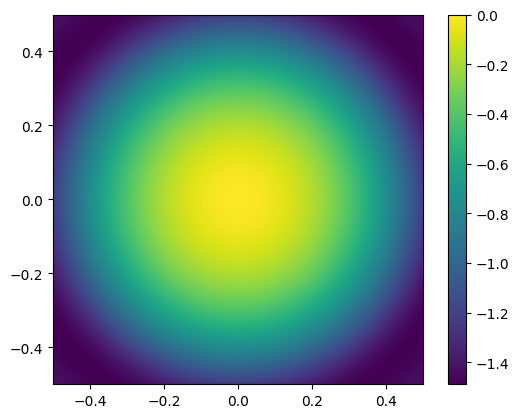

In [54]:
pupil_grid_2 = make_pupil_grid(1024)
aperture_2 = circular_aperture(1)(pupil_grid_2)

fresnel_prop = FresnelPropagator(pupil_grid_2, 1000000)

wf = Wavefront(aperture_2, 500e-9)
img = fresnel_prop(wf)

imshow_field(np.log10(img.intensity / img.intensity.max()))
plt.colorbar()
plt.show()

## One cannot get the franhoufer diffraction using the Fresnel propagator in hcipy becoz, this franhoufer propagator is using lens here and is not free propagating. If you want to simulate franhoufer using the fresnel propagator, then you will have to back calculate the free propagating distance required.